# Linear Regression

Some imagess from **An Introduction to Statistical Learning**
available at https://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (5, 5)
%config InlineBackend.figure_format = 'retina'

In [2]:
# dosage vs. treatment outcome for 100 subjects

dose_mg = np.array([
       238.2026173 , 170.00786042, 198.93689921, 262.04465996,
       243.37789951, 101.13610601, 197.50442088, 142.43213959,
       144.83905741, 170.5299251 , 157.20217856, 222.71367535,
       188.05188626, 156.08375082, 172.19316164, 166.68371637,
       224.70395366, 139.74208681, 165.65338508, 107.29521303,
        22.35050921, 182.68092977, 193.22180994, 112.89174898,
       263.4877312 ,  77.28171627, 152.28792587, 140.6408075 ,
       226.63896072, 223.4679385 , 157.74737128, 168.90812598,
       105.61071262,  50.96017659, 132.60439253, 157.81744846,
       211.51453404, 210.11899244, 130.63365913, 134.88486247,
        97.57235175,  78.99910314,  64.68649047, 247.53876976,
       124.51739091, 128.09628492,  87.360232  , 188.87451779,
        69.30510762, 139.36298599, 105.22667194, 169.34512489,
       124.45974312,  90.96839079, 148.59088858, 171.41659353,
       153.32586112, 165.12359489, 118.28389532, 131.8629417 ,
       116.37697761, 132.02234192, 109.3426859 ,  63.68586988,
       158.87130711, 129.91095319,  68.49008265, 173.13911278,
       104.63508178, 152.59726979, 186.45452811, 156.44914554,
       206.97003423,  88.25870898, 170.11708206, 115.75949545,
       106.46014254, 121.05751676, 134.42237339, 152.80826711,
        91.74250796, 195.04132435, 173.28312199,  73.18781569,
       224.41260969, 244.7944588 , 208.93897856, 141.00375821,
        96.46236892, 202.72258635, 129.84115265, 211.12225352,
       160.4137489 , 198.83195182, 167.81831986, 185.32865841,
       150.52500104, 239.2935247 , 156.34560464, 170.09946817])

outcome = np.array([
        97.21366827,  15.54678388,  24.32452483,  84.89909915,
        37.38200677,  64.15645021,  41.1037256 ,  20.65893867,
        74.66860488,  72.2427771 ,  76.65172385,  73.799312  ,
        29.78845786,  77.22223677,  37.68822299,  57.72005701,
        75.12102777,  31.83531984,  53.69493368,  45.26793669,
        13.11613793,  23.68221663,  54.27021597,  54.75065518,
        51.98057561,  16.32773826,  29.36891043,  72.14547644,
        70.10563532,  64.01622135,  24.03852133,  53.01201532,
        12.91602494,  13.37665531,  20.43417657,  52.98302801,
        64.41044984,  48.363773  ,  40.57854904,  11.85998544,
        -5.43206392,  28.53760981,  19.50509252,  74.58532118,
        78.79224323,  50.91366097,   3.58361349,  69.55895521,
        -8.9918713 ,  25.6090544 ,  24.94183588,  76.60313566,
        16.21983934,   6.21332693,  35.17867166,  29.58458265,
        60.86418372,  19.68226855,   6.62160078,  24.20933453,
        19.13359539,  71.59622656,  46.32408761,  17.6724923 ,
        15.2091164 ,  49.36499783,  -2.88178628,  12.38935626,
        49.91936629,  44.48816969,  65.0308085 ,  45.48683944,
        68.87912079,   9.04416538,  21.84441368,  42.57176423,
        10.54684235,  16.47338364,  24.49494328,  38.55164996,
        15.85574877,  21.26130522,  30.44841244, -26.17110912,
        68.60778144,  29.15746159,  30.14707785,  36.29424114,
         9.3243323 ,  81.54093849,   6.60314997,  58.12158077,
        39.31778086,  26.346118  ,  52.42011318,  42.90123798,
        53.06706128,  76.29346425,  82.35112014,  69.25542603])

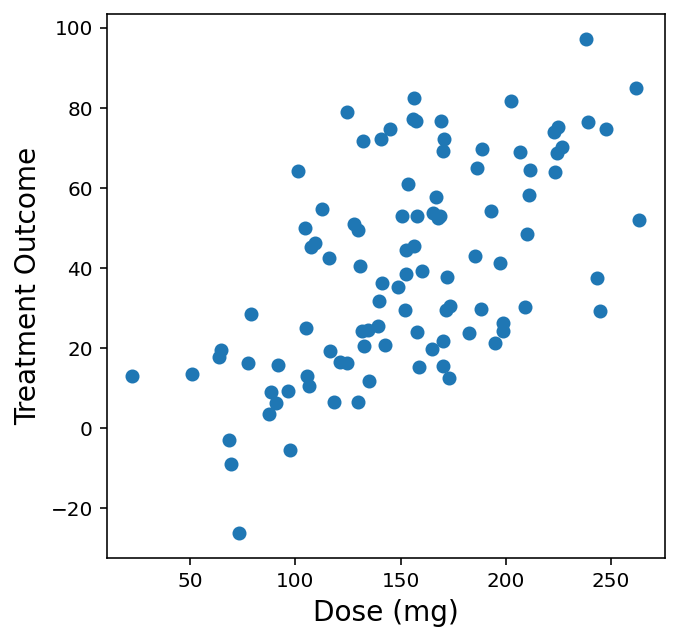

In [3]:
plt.plot(dose_mg, outcome, 'o')
plt.xlabel('Dose (mg)')
plt.ylabel('Treatment Outcome');

### <font color=darkred>What's the simplest relation between dosage and outcome that you can think of?</font>

### How about a straight line?

### Reshape data arrays into columns for both Pandas and linear regression.

Note: Some of the functions we will use require the data arrays to be in column format.

In [4]:
dose_mg.shape  # one dimensional array

(100,)

In [5]:
dose_mg = dose_mg.reshape((-1,1))  # 100 x 1 column
dose_mg.shape

(100, 1)

In [6]:
outcome = outcome.reshape((-1,1))  # 100 x 1 column
outcome.shape

(100, 1)

In [7]:
xy = np.hstack([dose_mg, outcome])  # concatenate column data
xy.shape

(100, 2)

In [8]:
df = pd.DataFrame(xy, columns=["Dose (mg)", "Outcome"]);
df

,Dose (mg),Outcome
0,238.202617,97.213668
1,170.007860,15.546784
2,198.936899,24.324525
3,262.044660,84.899099
4,243.377900,37.382007
...,...,...
95,185.328658,42.901238
96,150.525001,53.067061
97,239.293525,76.293464
98,156.345605,82.351120


### Seaborn will plot our data and automatically display the line of best fit and its 95% confidence interval.

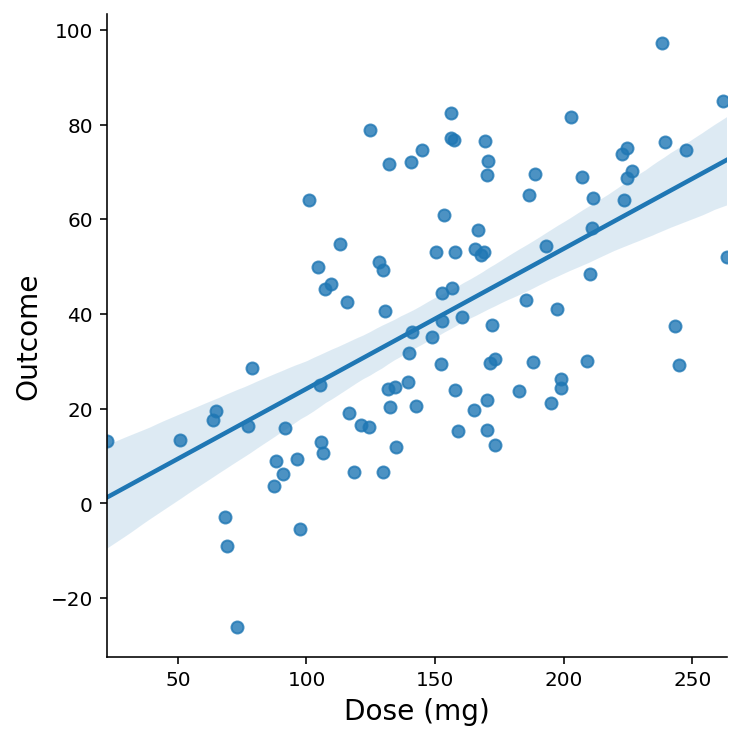

In [9]:
sns.lmplot(x="Dose (mg)", y="Outcome", data=df);

# A general model

# $y = f(x)$

# $outcome = f(dose)$

# A simple linear model

# $y = \beta x$

# $y = \beta_0 + \beta_1 x$

In [10]:
from sklearn.linear_model import LinearRegression

# create a model object
model = LinearRegression(fit_intercept=True)

In [11]:
# optimize the parameters of our model based on the input data
model.fit(dose_mg, outcome)

print(model.intercept_)  # y-intercept
print(model.coef_)  # slope

[-5.37884431]
[[0.29587937]]


# Plot the data overlaid with our model

In [12]:
doseRange_mg = np.linspace(0, 300, 301).reshape((-1, 1))  # column array

predictedOutcome = model.predict(doseRange_mg)

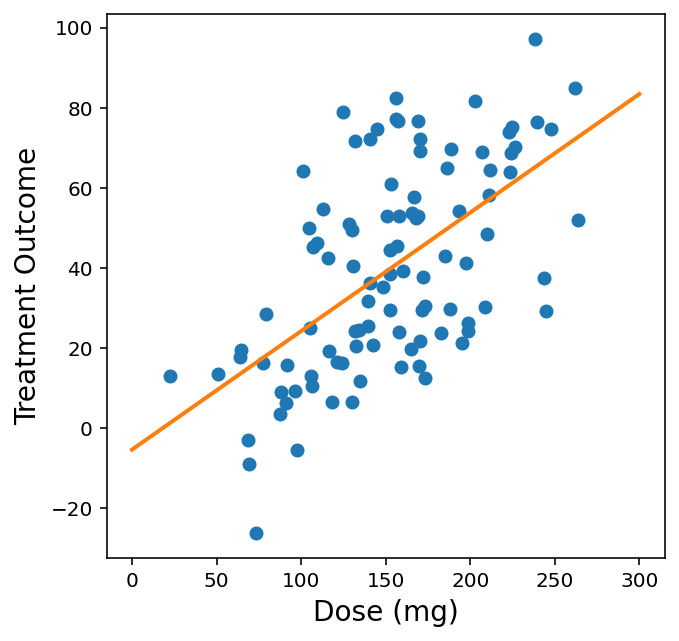

In [14]:
plt.plot(dose_mg, outcome, 'o')
plt.plot(doseRange_mg, predictedOutcome, '-', lw=2)
plt.xlabel('Dose (mg)')
plt.ylabel('Treatment Outcome');

# Residuals

For a model that describes data well, residuals should be normally distributed random fluctuations about zero.

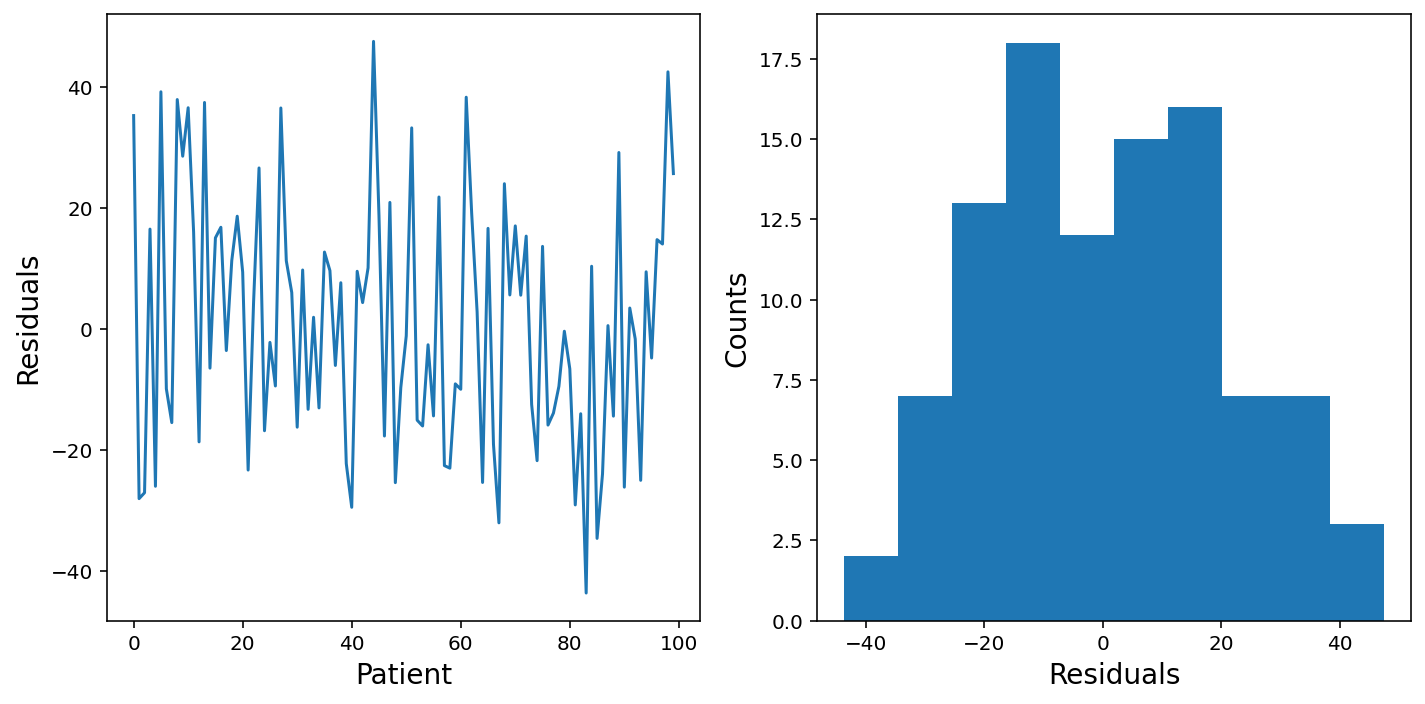

In [43]:
residuals = outcome - model.predict(dose_mg)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(residuals)
plt.xlabel('Patient')
plt.ylabel('Residuals')
plt.subplot(1,2,2)
plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Counts')
plt.tight_layout();

### Use residuals to visually assess whether a linear fit is appropriate.

![](images/linear_vs_quadratic_residuals.png)

### Variance should nbe normally distriibuted qually throughout. If not, can we transform the data to achieve this?

![](images/y_vs_logy_residuals.png)

# Mean Squared Error (MSE)

# $MSE = \frac{1}{n} \sum \limits_{i=1}^n \left( Y_{i,data} - \hat{Y}_{i,predicted} \right)^2$

In [33]:
mse = np.sum((outcome - model.predict(dose_mg))**2) / len(outcome)

mse

425.46334232457184

# Confidence Interval

* for each model parameter (i.e. slope and y-intercept)
* for the model's predicted line

# <font color=darkred>How to obtain a confidence interval for the model's slope and y-intercept?</font>

# Bootstrap sample from a collection of $(x,y)$ data points.

Consider a sample dataset: $(x_0,y_0), (x_1,y_1), (x_2,y_2), (x_3,y_3), (x_4,y_4)$

If you randomly choose $x_3, x_4, x_3, x_0, x_1$ as your bootstrapped $x$ values,

then you MUST choose $y_3, y_4, y_3, y_0, y_1$ as your bootstrapped $y$ values.

i.e. we are randomly selecting (with replacement) data points,

but we can NOT change the data by mixing $x$ and $y$ values between points.

In [40]:
xy = np.random.randint(0, 9, size=(5,2))

xy

array([[5, 7],
       [5, 7],
       [7, 7],
       [7, 8],
       [2, 2]])

In [41]:
# bootstrap sample data point indices
ind = np.random.choice(np.arange(5), size=5, replace=True)

ind

array([2, 4, 2, 0, 4])

In [42]:
bootstrapxy = xy[ind,:]

bootstrapxy

array([[7, 7],
       [2, 2],
       [7, 7],
       [5, 7],
       [2, 2]])

In [44]:
n = 1000
bs_models = []
bs_slopes = np.zeros((n,))
bs_yintercepts = np.zeros((n,))
for i in range(n):
    ind = np.random.choice(np.arange(len(outcome)), size=len(outcome), replace=True)
    x = dose_mg[ind]
    y = outcome[ind]
    model = LinearRegression(fit_intercept=True)
    model.fit(x, y)
    bs_slopes[i] = model.coef_
    bs_yintercepts[i] = model.intercept_
    bs_models.append(model)

In [45]:
slopeCI = np.quantile(bs_slopes, [0.025, 0.975])
yinterceptCI = np.quantile(bs_yintercepts, [0.025, 0.975])

slopeCI, yinterceptCI

(array([0.22083656, 0.37358444]), array([-16.68138589,   7.01758173]))

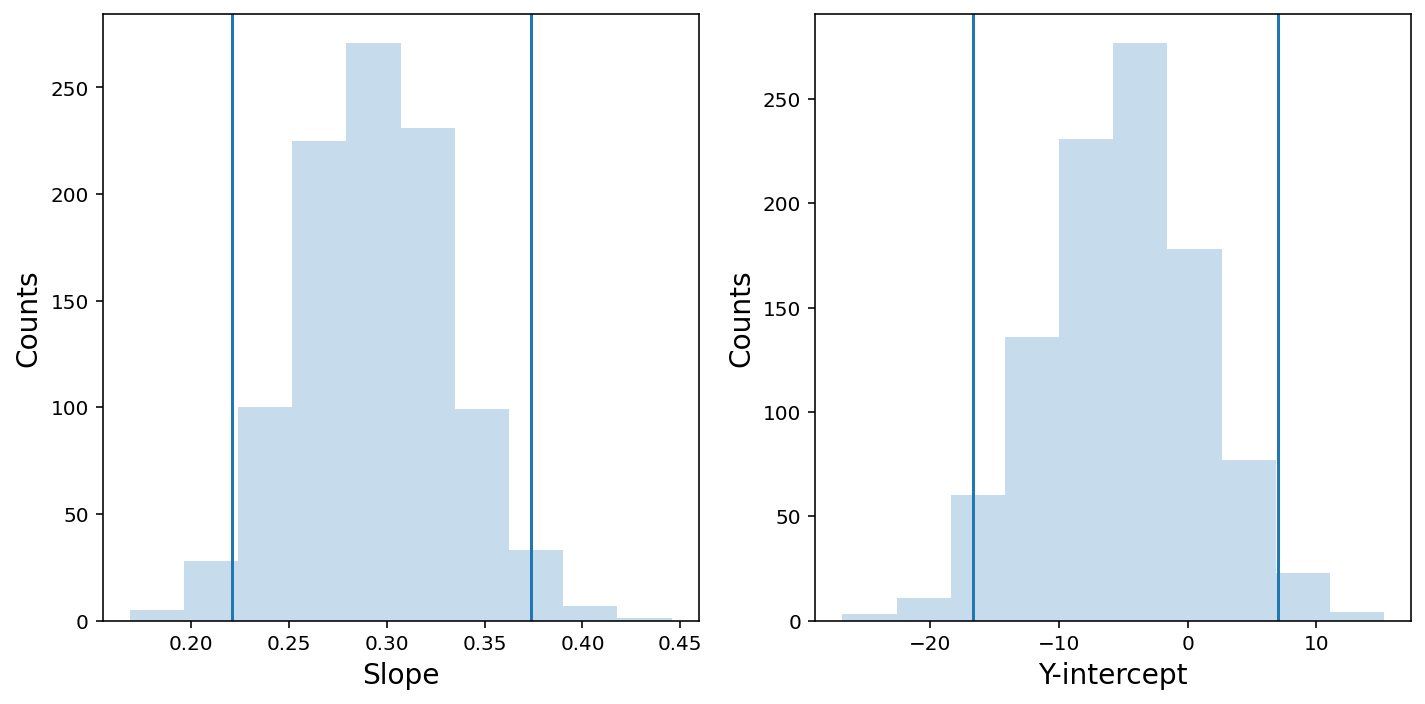

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(bs_slopes, alpha=0.25)
plt.axvline(slopeCI[0])
plt.axvline(slopeCI[1])
plt.xlabel('Slope')
plt.ylabel('Counts')
plt.subplot(1,2,2)
plt.hist(bs_yintercepts, alpha=0.25)
plt.axvline(yinterceptCI[0])
plt.axvline(yinterceptCI[1])
plt.xlabel('Y-intercept')
plt.ylabel('Counts')
plt.tight_layout();

# <font color=darkred>How to obtain a confidence interval for the model's linear fit?</font>

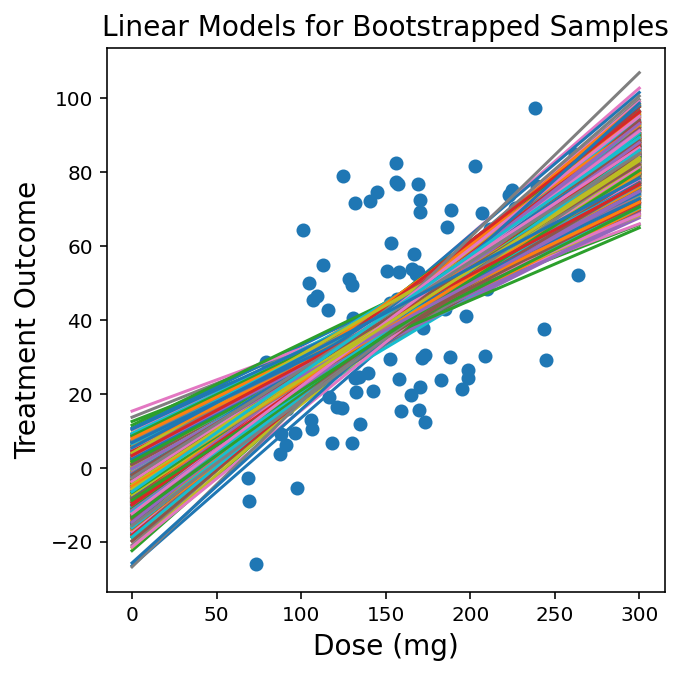

In [47]:
plt.plot(dose_mg, outcome, 'o')
for model in bs_models:
    plt.plot(doseRange_mg, model.predict(doseRange_mg), '-')
plt.xlabel('Dose (mg)')
plt.ylabel('Treatment Outcome')
plt.title('Linear Models for Bootstrapped Samples');

In [48]:
# Each column is the predicted outcomes for the model based on a single bootstrapped sample.
# Make sure you understand the broadcasting here.
predictedOutcomes = bs_yintercepts.reshape((1,-1)) + doseRange_mg.reshape((-1,1)) * bs_slopes.reshape((1,-1))

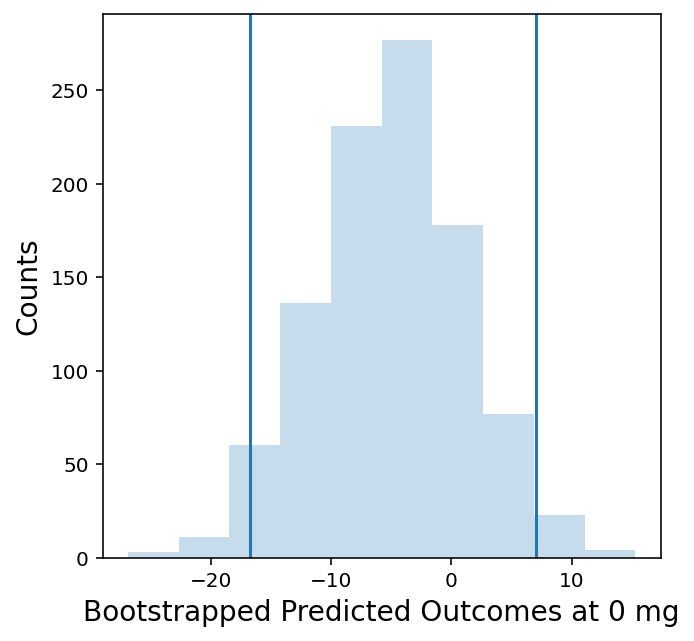

In [49]:
plt.hist(predictedOutcomes[0,:], alpha=0.25)
lb, ub = np.quantile(predictedOutcomes[0,:], [0.025, 0.975])
plt.axvline(lb)
plt.axvline(ub)
plt.xlabel("Bootstrapped Predicted Outcomes at 0 mg")
plt.ylabel("Counts");

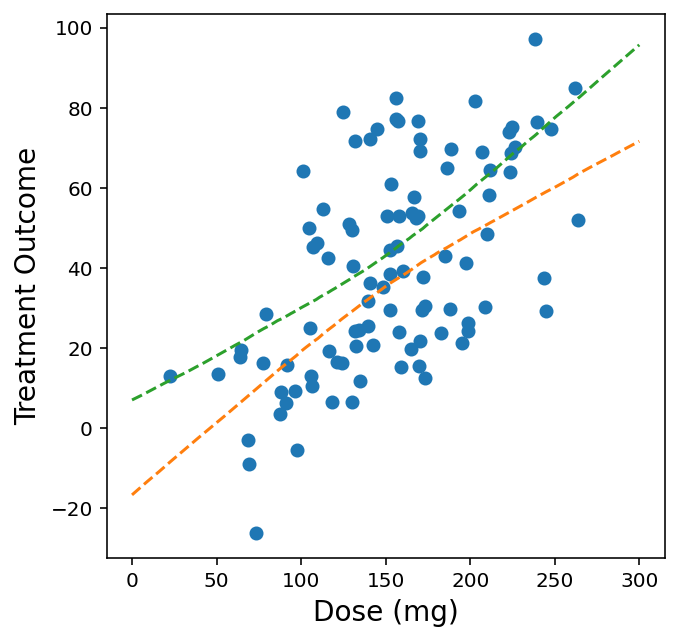

In [50]:
# 95% confidence intreval at each dosage in doseRange_mg
lb, ub = np.quantile(predictedOutcomes, [0.025, 0.975], axis=1)

plt.plot(dose_mg, outcome, 'o')
plt.plot(doseRange_mg, lb, '--')
plt.plot(doseRange_mg, ub, '--')
plt.xlabel('Dose (mg)')
plt.ylabel('Treatment Outcome');

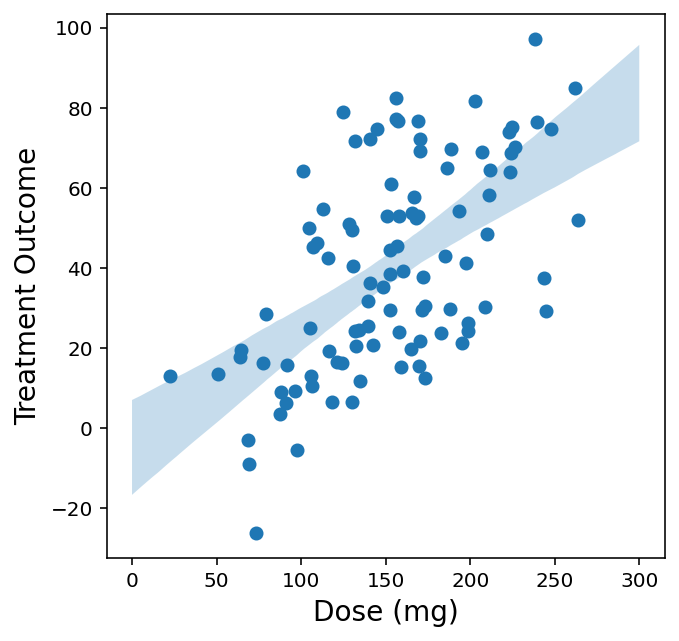

In [51]:
plt.plot(dose_mg, outcome, 'o')
plt.fill_between(doseRange_mg.reshape(lb.shape), lb, ub, alpha=0.25)
plt.xlabel('Dose (mg)')
plt.ylabel('Treatment Outcome');

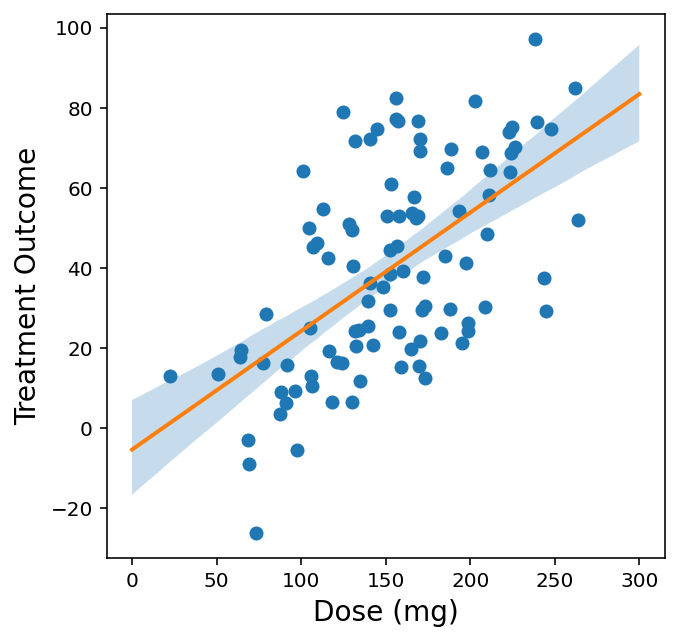

In [53]:
plt.plot(dose_mg, outcome, 'o')
plt.fill_between(doseRange_mg.reshape(lb.shape), lb, ub, alpha=0.25)
plt.plot(doseRange_mg, predictedOutcome, '-', lw=2)
plt.xlabel('Dose (mg)')
plt.ylabel('Treatment Outcome');

# Outliers

![](images/outliers.png)

# Leverage

![](images/leverage.png)

# Linear regression assumes errors are NOT correlated!!! For a time series, this will NOT be true.

![](images/timeseries.png)

# A general model that depends on multiple factors

# $y = f(x_1, x_2, \dots, x_N)$

# $outcome = f(dose, age, \dots)$

# A multiple linear regression model

# $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_N x_N$

# Diabetes dataset

In [32]:
# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('diabetes.csv')
df

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [61]:
df.head(3)

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141


### $dis = f(age, sex, bp, tc, ldl, hdl, tch, ltg, glu)$

### $dis = \beta_0 + \beta_1 age + \beta_2 sex + \beta_3 bp + \dots + \beta_9 glu$

In [57]:
X = df.loc[:,'AGE':'GLU'].to_numpy()

X.shape

(442, 10)

In [59]:
y = df['DIS'].to_numpy()

y.shape

(442,)

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print(model.intercept_)  # y-intercept
print(model.coef_)  # slopes

-334.5671385187876
[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]


In [70]:
features = list(df.columns.values)
features

['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU', 'DIS']

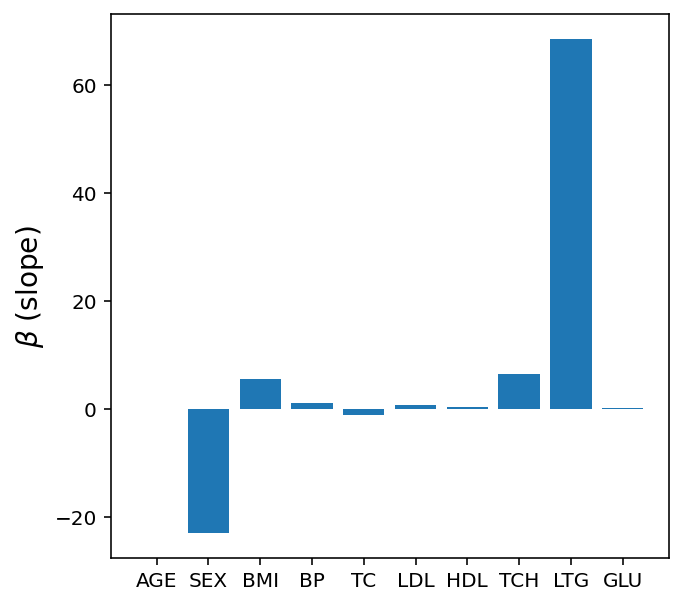

In [71]:
plt.bar(range(len(model.coef_)), model.coef_)
plt.xticks(range(len(model.coef_)), features[:-1])
plt.ylabel(r'$\beta$ (slope)');

# <font color=darkred>Exercise</font>

Make a scatter plot of the measured vs. predicted disease progression in each patient.

In [ ]:
measuredDiabetes = y
predictedDiabetes = ...

plt.scatter(measuredDiabetes, predictedDiabetes)
plt.xlabel('Measured Diabetes')
plt.ylabel('Predicted Diabetes');

# <font color=darkred>Exercise</font>

1. Plot the residuals between measured and predicted disease progression in each patient.
2. Are the residuals normally distributed?
3. Compute the mean squared error (MSE) for the model predictions.

In [ ]:
residuals = ...
MSE = ...

print(f"MSE = {MSE}")

plt.plot(residuals)
plt.xlabel('Patients')
plt.ylabel('Residuals');

# <font color=darkred>Exercise</font>

Use the model to predict diabetes progression in a new patient.

In [73]:
age = 50
sex = 1
bmi = 20
map_ = 125
tc = 150
ldl = 100
hdl = 55
tch = 6.5
ltg = 4
glu = 120

newPatient = np.array([age, sex, bmi, map_, tc, ldl, hdl, tch, ltg, glu]).reshape((1,-1))  # row array
newPatient

array([[ 50. ,   1. ,  20. , 125. , 150. , 100. ,  55. ,   6.5,   4. ,
        120. ]])

In [ ]:
predictedDiabetesForNewPatient = ...

predictedDiabetesForNewPatient

# But the features have different unrelated units and scales.

In [81]:
df.head(3)

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141


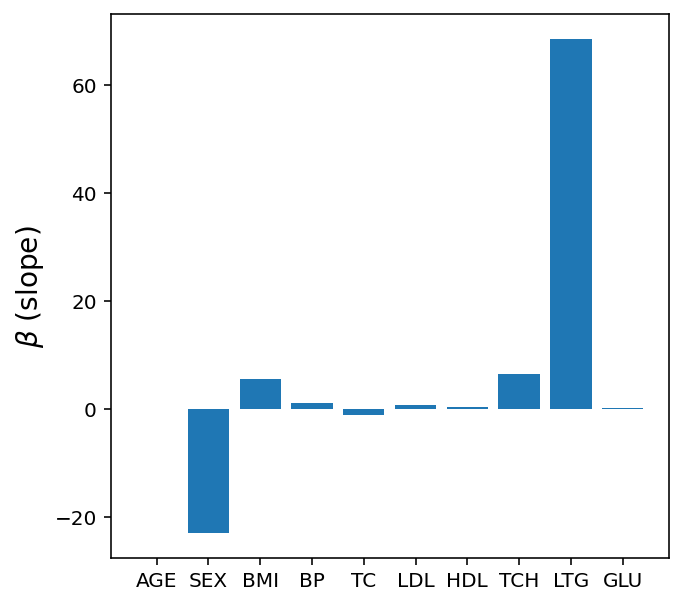

In [88]:
n = len(model.coef_)
plt.bar(range(n), model.coef_)
plt.xticks(range(n), features[:-1])
plt.ylabel(r'$\beta$ (slope)');

# Standardize data features

1. Subtract the mean of each feature.

In [84]:
Xs = X - X.mean(axis=0)

2. Normalize the variance of each feature.

In [85]:
Xs = Xs / Xs.std(axis=0)

In [86]:
Xs.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [87]:
smodel = LinearRegression(fit_intercept=False)
smodel.fit(Xs, y);

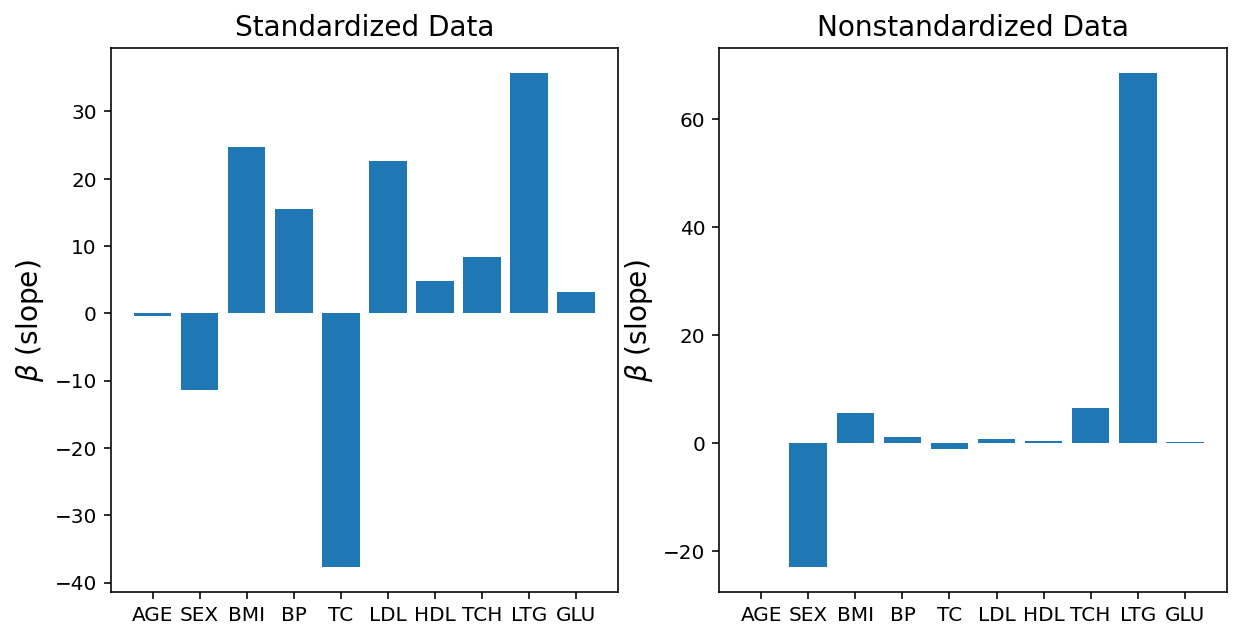

In [90]:
n = len(smodel.coef_)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(range(n), smodel.coef_)
plt.xticks(range(n), features[:-1])
plt.ylabel(r'$\beta$ (slope)')
plt.title('Standardized Data');
plt.subplot(1,2,2)
plt.bar(range(n), model.coef_)
plt.xticks(range(n), features[:-1])
plt.ylabel(r'$\beta$ (slope)')
plt.title('Nonstandardized Data');